In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
AUCs = pd.Series([0, .6870, .6978, .7017], index = [0, 5, 10, 20])

In [3]:
path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe

In [4]:
target_variable = 'injured_or_killed'
column_names = [i for i in pickle.load(open(path+'data_for_training/v4/collisions_1hot.pkl', 'rb')).columns.values if i != target_variable]

best_xgboost_all_data.pkl


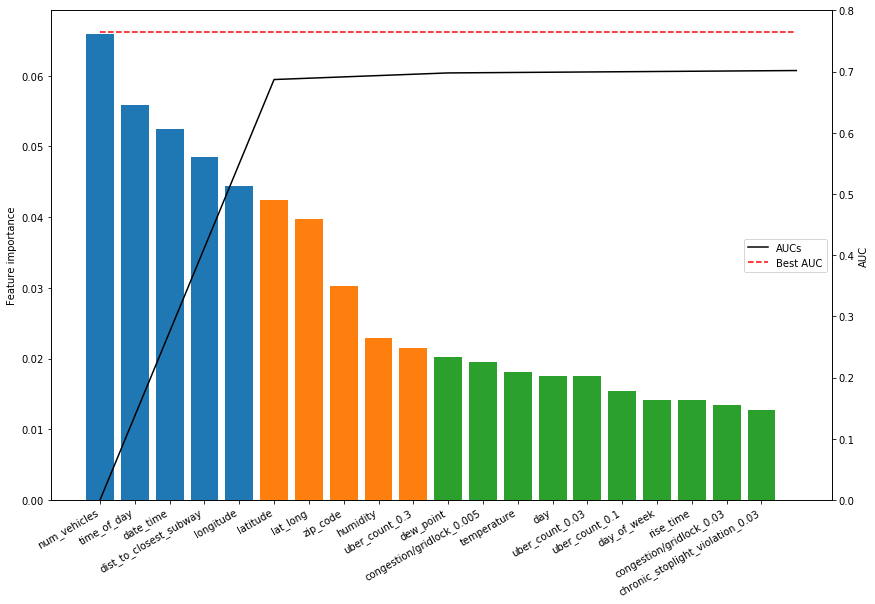

In [15]:
rf = {}

for file in ['best_xgboost_all_data.pkl']:
    with open(os.path.join(path+"models/", file), 'rb') as infile:
        rf[file] = pickle.load(infile)

    print(file)
    fig, ax1 = plt.subplots(figsize=(14, 10))
    num_features = 20
    y_pos = np.arange(num_features)

    importances = pd.Series(rf[file].feature_importances_, index=column_names)
    topX = importances.sort_values(ascending = False)[:num_features]
    
    topXa = topX*[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    topXb = topX*[0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
    topXc = topX*[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
    plt.bar(y_pos, topXa)
    plt.bar(y_pos, topXb)
    plt.bar(y_pos, topXc)
    
    plt.xticks(y_pos, topX.index)
    ax1.set_ylabel('Feature importance')
    
    ax2 = ax1.twinx()
    ax2.plot(AUCs, color = 'black', label='AUCs')
    ax2.plot(pd.Series([0.7651,0.7651,0.7651,0.7651], index = [0, 5, 10, 20]), 'r--', label='Best AUC')
    ax2.set_ylabel('AUC')
    ax2.set_ylim([0, 0.8])
    plt.legend(loc=7)
    fig.autofmt_xdate()